### ONLINE RETAIL ANALYSIS


#### 1.LOADING DATA

In [343]:
!wget https://archive.ics.uci.edu/static/public/352/online+retail.zip

--2025-06-18 10:32:23--  https://archive.ics.uci.edu/static/public/352/online+retail.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘online+retail.zip.1’

online+retail.zip.1     [   <=>              ]  22.62M  49.2MB/s    in 0.5s    

2025-06-18 10:32:24 (49.2 MB/s) - ‘online+retail.zip.1’ saved [23715478]



In [ ]:
!unzip online+retail.zip


Archive:  online+retail.zip
replace Online Retail.xlsx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
pip install pandas


In [ ]:
import pandas as pd
df=pd.read_excel('Online Retail.xlsx')
df.head()


#### 2.HANDLING MISSING DATA

In [13]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [14]:
df.Description[df.Description.isnull()==True]

,Description
622,NaN
1970,NaN
1971,NaN
1972,NaN
1987,NaN
...,...
535322,NaN
535326,NaN
535332,NaN
536981,NaN


In [15]:
df[df.index==6252]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
6252,536876,21313,GLASS HEART T-LIGHT HOLDER,1,2010-12-03 11:36:00,1.66,NaN,United Kingdom


In [16]:
df[["StockCode","Description"]][df.Description.isnull()==True]

,StockCode,Description
622,22139,NaN
1970,21134,NaN
1971,22145,NaN
1972,37509,NaN
1987,85226A,NaN
...,...,...
535322,84581,NaN
535326,23406,NaN
535332,21620,NaN
536981,72817,NaN


In [17]:
df[["StockCode","Description"]][df.Description.isnull()==True]

,StockCode,Description
622,22139,NaN
1970,21134,NaN
1971,22145,NaN
1972,37509,NaN
1987,85226A,NaN
...,...,...
535322,84581,NaN
535326,23406,NaN
535332,21620,NaN
536981,72817,NaN


In [18]:
maxf=df[["StockCode","Description"]].value_counts().reset_index()
maxf=maxf.groupby("StockCode").head(1)
maxf.shape

(3958, 3)

In [19]:
d2=df.merge(maxf,on="StockCode",how="right")
d2
d2['Description_x']=d2['Description_y']
d2

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Description_y,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,2302
...,...,...,...,...,...,...,...,...,...,...
541792,548999,84743C,damages,-26,2011-04-05 14:34:00,0.00,NaN,United Kingdom,damages,1
541793,554311,84743C,damages,-16,2011-05-23 15:28:00,0.00,NaN,United Kingdom,damages,1
541794,543899,84803A,PINK ALLIUM ARTIFICIAL FLOWER,3,2011-02-14 12:11:00,1.69,NaN,EIRE,PINK ALLIUM ARTIFICIAL FLOWER,1
541795,542731,84795C,OCEAN STRIPE HAMMOCK,2,2011-01-31 15:27:00,7.95,13600.0,United Kingdom,OCEAN STRIPE HAMMOCK,1


In [20]:
d2.drop("Description_y",axis=1,inplace=True)
d2


,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,count
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2302
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,2302
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,2302
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,2302
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,2302
...,...,...,...,...,...,...,...,...,...
541792,548999,84743C,damages,-26,2011-04-05 14:34:00,0.00,NaN,United Kingdom,1
541793,554311,84743C,damages,-16,2011-05-23 15:28:00,0.00,NaN,United Kingdom,1
541794,543899,84803A,PINK ALLIUM ARTIFICIAL FLOWER,3,2011-02-14 12:11:00,1.69,NaN,EIRE,1
541795,542731,84795C,OCEAN STRIPE HAMMOCK,2,2011-01-31 15:27:00,7.95,13600.0,United Kingdom,1


In [21]:
d2.drop('count',axis=1,inplace=True)
d2

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
541792,548999,84743C,damages,-26,2011-04-05 14:34:00,0.00,NaN,United Kingdom
541793,554311,84743C,damages,-16,2011-05-23 15:28:00,0.00,NaN,United Kingdom
541794,543899,84803A,PINK ALLIUM ARTIFICIAL FLOWER,3,2011-02-14 12:11:00,1.69,NaN,EIRE
541795,542731,84795C,OCEAN STRIPE HAMMOCK,2,2011-01-31 15:27:00,7.95,13600.0,United Kingdom


In [22]:
d2[d2.Description_x.isnull()==True]
d2.Description_x.isnull().sum()
d2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


In [23]:
d2.dropna(subset=['Description_x'],inplace=True)
d2.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description_x,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,134968
Country,0


In [24]:
d2.CustomerID.isnull()
d2[d2.CustomerID.isnull()==True]

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
11,536544,85123A,WHITE HANGING HEART T-LIGHT HOLDER,4,2010-12-01 14:32:00,5.91,NaN,United Kingdom
15,536592,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9,2010-12-01 17:06:00,5.91,NaN,United Kingdom
39,536876,85123A,WHITE HANGING HEART T-LIGHT HOLDER,5,2010-12-03 11:36:00,5.91,NaN,United Kingdom
56,537237,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2,2010-12-06 09:58:00,5.91,NaN,United Kingdom
58,537240,85123A,WHITE HANGING HEART T-LIGHT HOLDER,9,2010-12-06 10:08:00,5.91,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541790,561640,84802B,PURPLE ANEMONE ARTIFICIAL FLOWER,-125,2011-07-28 14:58:00,0.00,NaN,United Kingdom
541792,548999,84743C,damages,-26,2011-04-05 14:34:00,0.00,NaN,United Kingdom
541793,554311,84743C,damages,-16,2011-05-23 15:28:00,0.00,NaN,United Kingdom
541794,543899,84803A,PINK ALLIUM ARTIFICIAL FLOWER,3,2011-02-14 12:11:00,1.69,NaN,EIRE


In [25]:
d2.columns

Index(['InvoiceNo', 'StockCode', 'Description_x', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

#### 3.FEATURE ENGINEERING

In [26]:
d2['total_price']=d2['Quantity']*d2['UnitPrice']
d2


,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.30
3,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,2010-12-01 10:19:00,2.55,17511.0,United Kingdom,163.20
4,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,81.60
...,...,...,...,...,...,...,...,...,...
541792,548999,84743C,damages,-26,2011-04-05 14:34:00,0.00,NaN,United Kingdom,-0.00
541793,554311,84743C,damages,-16,2011-05-23 15:28:00,0.00,NaN,United Kingdom,-0.00
541794,543899,84803A,PINK ALLIUM ARTIFICIAL FLOWER,3,2011-02-14 12:11:00,1.69,NaN,EIRE,5.07
541795,542731,84795C,OCEAN STRIPE HAMMOCK,2,2011-01-31 15:27:00,7.95,13600.0,United Kingdom,15.90


In [28]:
d2['month']=d2['InvoiceDate'].dt.month
d2.head(3)

,InvoiceNo,StockCode,Description_x,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price,month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3,12
1,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.3,12
2,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,15.3,12


#### 4.VISUALISATION

In [116]:
m=d2.groupby("month")['total_price'].sum()
m

,total_price
month,
1,560000.260
2,498062.650
3,683267.080
4,493207.121
5,723333.510
6,691123.120
7,681300.111
8,682680.510
9,1019687.622


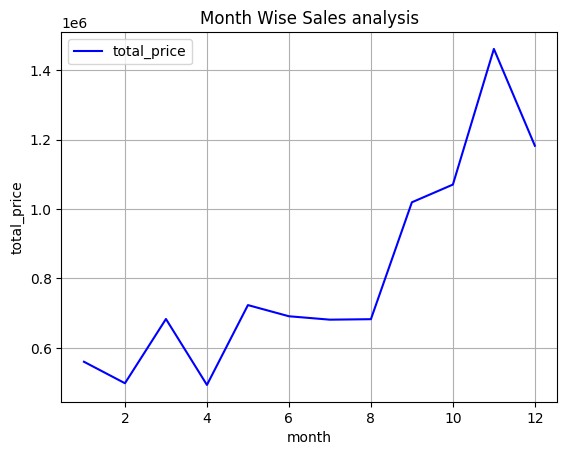

In [330]:
from matplotlib import pyplot as plt
plt.plot(m.index,m.values,color="blue",label="total_price")
plt.title("Month Wise Sales analysis")
plt.xlabel("month")
plt.ylabel("total_price")
plt.grid()
plt.legend()

Text(0, 0.5, 'SALES')

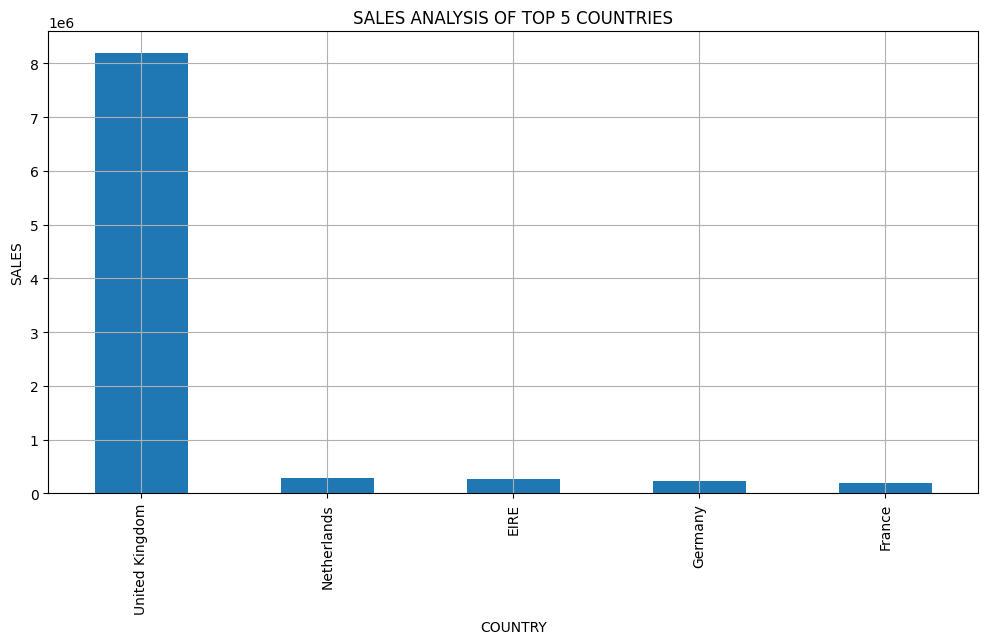

In [331]:
max_con=d2.groupby("Country").total_price.sum().sort_values(ascending=False).head(5)
max_con.plot(kind="bar",grid=True,title="SALES ANALYSIS OF TOP 5 COUNTRIES",figsize=(12,6),)

plt.xlabel("COUNTRY")
plt.ylabel("SALES")

Text(0.5, 1.0, 'SALES ANALYSIS OF TOP 5 COUNTRIES USING %')

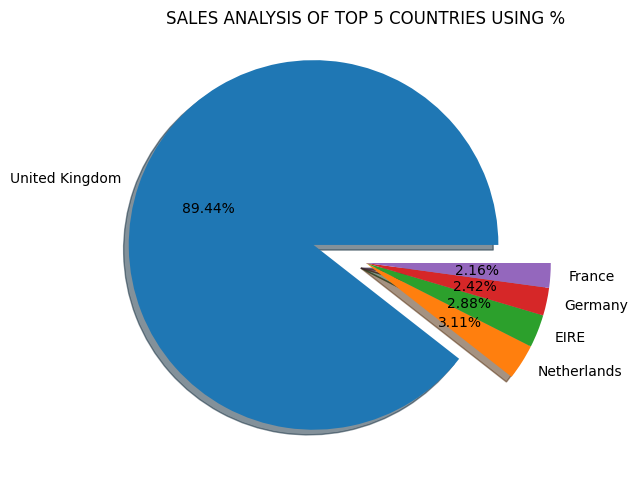

In [333]:
max_con=d2.groupby("Country").total_price.sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12,6))
plt.pie(max_con,labels=max_con.index,autopct="%.2f%%",shadow=True,explode=(0.3,0,0,0,0))
plt.title("SALES ANALYSIS OF TOP 5 COUNTRIES USING %")

#### 5. CUSTOMER'S RECENCY , FREQUENCY , MONETARY (RFM) ANALYSIS

In [226]:

last_date=d2['InvoiceDate'].max().date()
current_date=last_date+pd.Timedelta(days=1)
current_date

datetime.date(2011, 12, 10)

In [242]:
rm=d2.groupby('CustomerID').agg({'InvoiceDate':lambda x:(current_date-x.dt.date.max()).days,
                                 'InvoiceNo':'count',
                                 'total_price':'sum'})
rm.columns=['recency','frequency','monetary']
rm


,recency,frequency,monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


In [244]:
rm['r seg']=pd.qcut(rm['recency'],4,labels=[4,3,2,1])
rm['f seg']=pd.qcut(rm['frequency'],4,labels=[1,2,3,4])
rm['m seg']=pd.qcut(rm['monetary'],4,labels=[1,2,3,4])
rm['rfm']=rm['r seg'].astype(str)+rm['f seg'].astype(str)

rm


,recency,frequency,monetary,r seg,f seg,m seg,rfm
CustomerID,,,,,,,
12346.0,326,2,0.00,1,1,1,11
12347.0,3,182,4310.00,4,4,4,44
12348.0,76,31,1797.24,2,2,4,22
12349.0,19,73,1757.55,3,3,4,33
12350.0,311,17,334.40,1,1,2,11
...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,11
18281.0,181,7,80.82,1,1,1,11
18282.0,8,13,176.60,4,1,1,41


In [279]:
r_group=rm.groupby("r seg")['recency'].count()
f_group=rm.groupby("f seg")['frequency'].count()
m_group=rm.groupby("m seg")['monetary'].count()


<ipython-input-279-1767492513>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  r_group=rm.groupby("r seg")['recency'].count()
<ipython-input-279-1767492513>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_group=rm.groupby("f seg")['frequency'].count()
<ipython-input-279-1767492513>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  m_group=rm.groupby("m seg")['monetary'].count()


Text(99.34722222222221, 0.5, 'count')

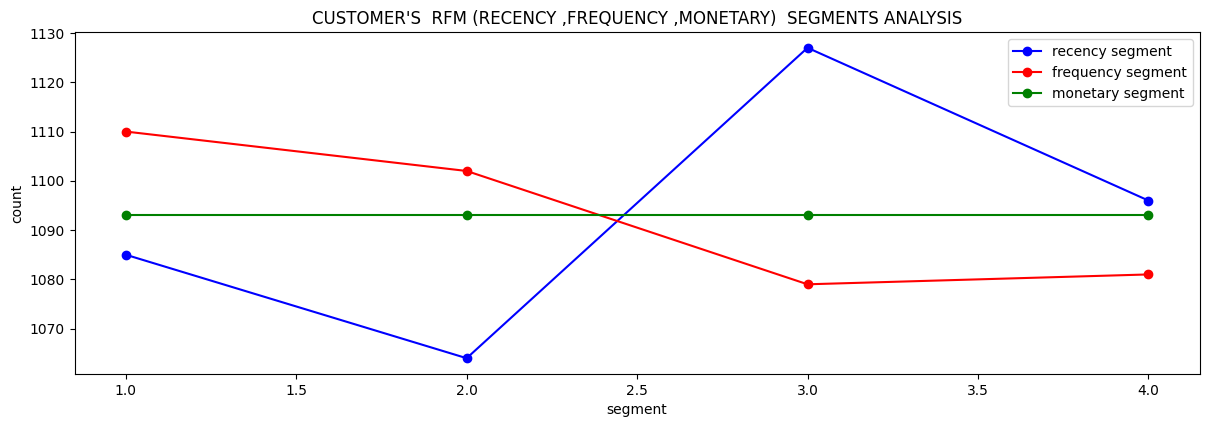

In [337]:
plt.figure(figsize=(12,4))
plt.plot(r_group.index,r_group.values,label="recency segment",color="blue",marker='o')
plt.plot(f_group.index,f_group.values,label="frequency segment",color="red",marker='o')
plt.plot(m_group.index,m_group.values,label="monetary segment",color="green",marker='o')
plt.tight_layout()
plt.title("CUSTOMER'S  RFM (RECENCY ,FREQUENCY ,MONETARY)  SEGMENTS ANALYSIS")
plt.legend()
plt.xlabel("segment")
plt.ylabel("count")



<Axes: title={'center': 'CUSTOMERS ANALYSIS USING RFM TOTAL'}, xlabel='rfm', ylabel='Count'>

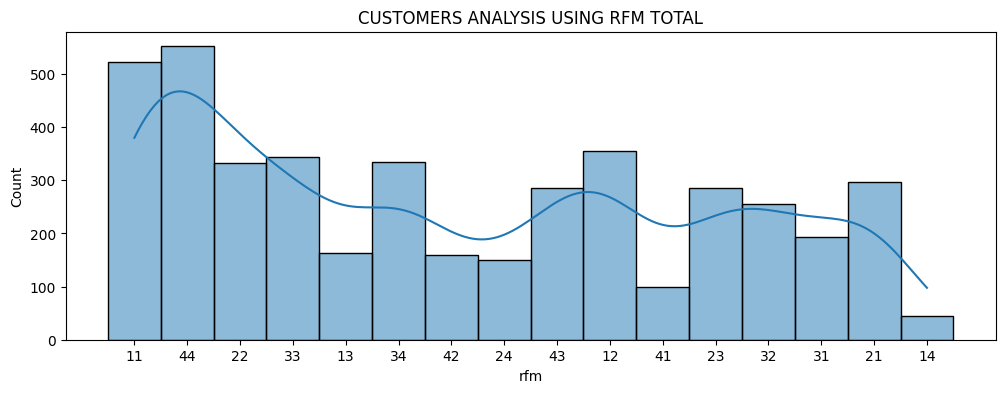

In [338]:
import seaborn as sns
plt.figure(figsize=(12,4))
plt.title('CUSTOMERS ANALYSIS USING RFM TOTAL')
sns.histplot(rm['rfm'],kde=True)

#### 6.CUSTOMER CHURN ANALYSIS

In [304]:
rm.recency.max()

374

In [316]:

churn=rm['recency'][rm.recency >90]
churn.columns=['churning customers']
churn

,recency
CustomerID,
12346.0,326
12350.0,311
12353.0,205
12354.0,233
12355.0,215
...,...
18262.0,141
18268.0,135
18269.0,359


<Axes: title={'center': 'CHURNING CUSTOMERS ANALYSIS '}, xlabel='recency', ylabel='Count'>

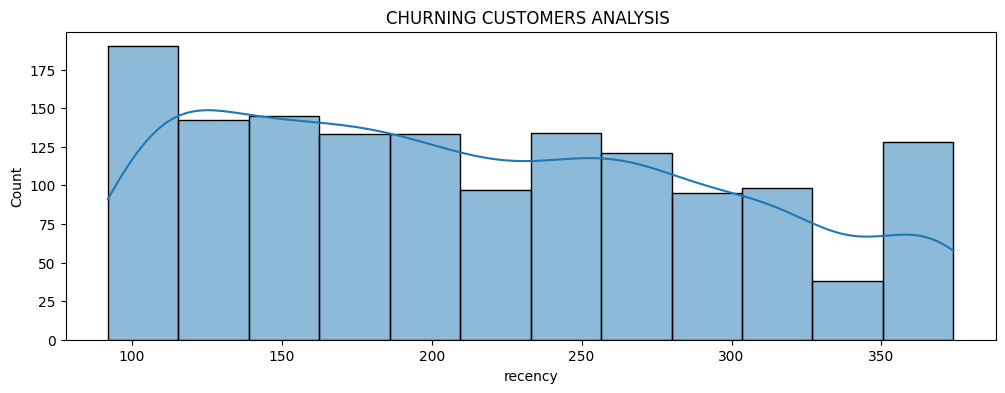

In [339]:

plt.figure(figsize=(12,4))
plt.title("CHURNING CUSTOMERS ANALYSIS ")
sns.histplot(churn,kde=True)